# 환자 데이터를 활용한 응급 환자 분류 예측

## MLP 모델

### 라이브러리 호출

In [37]:
from IPython.core.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report

C:\Users\asia\AppData\Local\Temp\ipykernel_23560\1285654197.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


### 데이터 불러오기

In [38]:
path = 'D:/ML/Example/Dataset/'
# path = 'C:/Users/kcpak/Desktop/Projects/MDA04/ML/Dataset/'
data = pd.read_csv(path + 'synthetic_medical_triage.csv')

### 데이터 전처리

In [39]:
data2 = data.copy()
mode_map = {"walk_in": 0, "wheelchair": 1, "ambulance": 2}
data2["arrival_mode"] = data2["arrival_mode"].map(mode_map)

# 순서가 있는 범주형 데이터로 변환
mode_map2 = {0: 'Low', 1: 'Medium', 2: "High", 3:'Critical'}
level_order = ['Low', 'Medium', 'High', 'Critical']
data2["triage_level"] = data2["triage_level"].map(mode_map2)
data2["triage_level"] = pd.Categorical(data2["triage_level"], 
                                       categories=level_order, ordered=True)
data2.head()

,age,heart_rate,systolic_blood_pressure,oxygen_saturation,body_temperature,pain_level,chronic_disease_count,previous_er_visits,arrival_mode,triage_level
0,17.9,95.4,147.1,97.4,36.48,1,0,0,0,Low
1,79.2,147.9,158.6,96.0,39.35,10,4,2,2,Critical
2,51.1,87.1,128.2,98.5,37.74,5,2,2,0,Medium
3,56.8,84.7,147.2,92.5,37.55,4,4,4,0,Medium
4,39.2,58.0,107.8,99.0,36.26,2,1,1,0,Low


### 데이터 내 feature 추출

In [40]:
X = data2.iloc[:, :-1]; X

,age,heart_rate,systolic_blood_pressure,oxygen_saturation,body_temperature,pain_level,chronic_disease_count,previous_er_visits,arrival_mode
0,17.9,95.4,147.1,97.4,36.48,1,0,0,0
1,79.2,147.9,158.6,96.0,39.35,10,4,2,2
2,51.1,87.1,128.2,98.5,37.74,5,2,2,0
3,56.8,84.7,147.2,92.5,37.55,4,4,4,0
4,39.2,58.0,107.8,99.0,36.26,2,1,1,0
...,...,...,...,...,...,...,...,...,...
17995,52.8,100.1,145.0,95.4,37.82,4,2,1,0
17996,37.1,84.8,128.0,98.0,37.04,3,3,3,2
17997,59.2,64.9,103.1,93.9,36.55,5,1,0,0
17998,70.4,90.6,144.1,96.1,38.08,3,4,3,2


### 데이터 내 종속변수(환자 응급 수준 - 4 levels) 추출
### Low (경증) - Medium (중등증) - High (중증) - Critical (위증)

In [41]:
y = data2.iloc[:, -1]; y

0             Low
1        Critical
2          Medium
3          Medium
4             Low
           ...   
17995      Medium
17996      Medium
17997      Medium
17998         Low
17999        High
Name: triage_level, Length: 18000, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Critical']

### 훈련용/테스트용 데이터 생성

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [43]:
print(len(train_X))
print(len(test_X))
print(len(train_y))
print(len(test_y))


14400
3600
14400
3600


### MLP 모델 설정

In [44]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 200, 50, 20,),
                          max_iter = 500, random_state = 1)

### MLP 모델 학습

In [45]:
mlp_model.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(100, 200, 50, 20), max_iter=500,
              random_state=1)

### MLP 모델 예측

In [46]:
mlp_model.predict(test_X)

array(['Medium', 'Medium', 'Critical', ..., 'Low', 'Medium', 'Low'],
      shape=(3600,), dtype='<U8')

In [47]:
mlp_pred_y = mlp_model.predict(test_X)
mlp_pred_y = pd.Categorical(mlp_pred_y, categories=level_order, ordered=True)

### 관측 데이터 vs. 모델 예측 결과

In [48]:
res = pd.crosstab(test_y, mlp_pred_y,
                  rownames = ['Observed'],
                  colnames=['Predicted'],
                  margins=False); res

Predicted,Low,Medium,High,Critical
Observed,,,,
Low,1949,26,1,0
Medium,135,750,17,1
High,2,61,493,2
Critical,0,0,10,153


In [49]:
res1 = pd.crosstab(test_y, mlp_pred_y,
                  rownames = ['Observed'],
                  colnames=['Predicted'],
                  margins=True); res1

Predicted,Low,Medium,High,Critical,All
Observed,,,,,
Low,1949,26,1,0,1976
Medium,135,750,17,1,903
High,2,61,493,2,558
Critical,0,0,10,153,163
All,2086,837,521,156,3600


In [50]:
res.sum(axis = 1).sum()

np.int64(3600)

### MLP 모델 정확도

In [51]:
mlp_model.score(test_X, test_y)

0.9291666666666667

In [52]:
mlp_model.score(train_X, train_y)

0.9324305555555555

### 모델 예측 교란 행렬

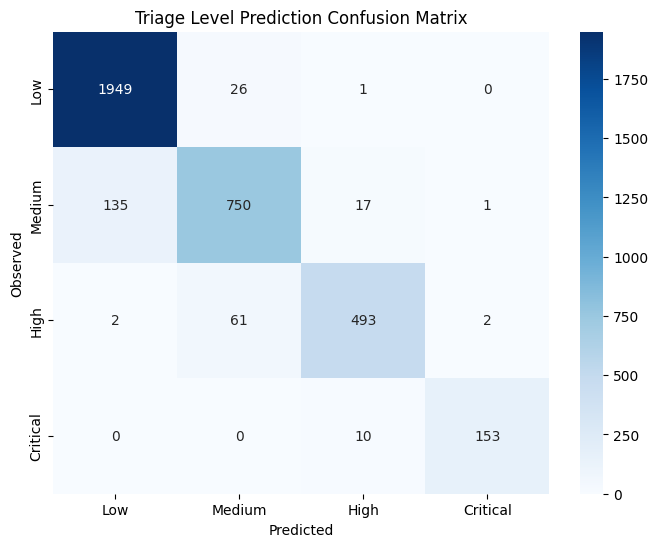

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(res, annot=True, fmt='d', cmap='Blues')
plt.title('Triage Level Prediction Confusion Matrix')
plt.show()

### 모델 결과 Report

In [54]:
report = classification_report(test_y, mlp_pred_y, target_names=mlp_model.classes_)

print("### MLP 모델 분류 리포트 ###")
print(report)

### MLP 모델 분류 리포트 ###
              precision    recall  f1-score   support

    Critical       0.98      0.94      0.96       163
        High       0.95      0.88      0.91       558
         Low       0.93      0.99      0.96      1976
      Medium       0.90      0.83      0.86       903

    accuracy                           0.93      3600
   macro avg       0.94      0.91      0.92      3600
weighted avg       0.93      0.93      0.93      3600



## k-NN 모델

학습에 사용된 칼럼들: ['age', 'heart_rate', 'systolic_blood_pressure', 'oxygen_saturation', 'body_temperature', 'pain_level', 'chronic_disease_count', 'previous_er_visits', 'arrival_mode']


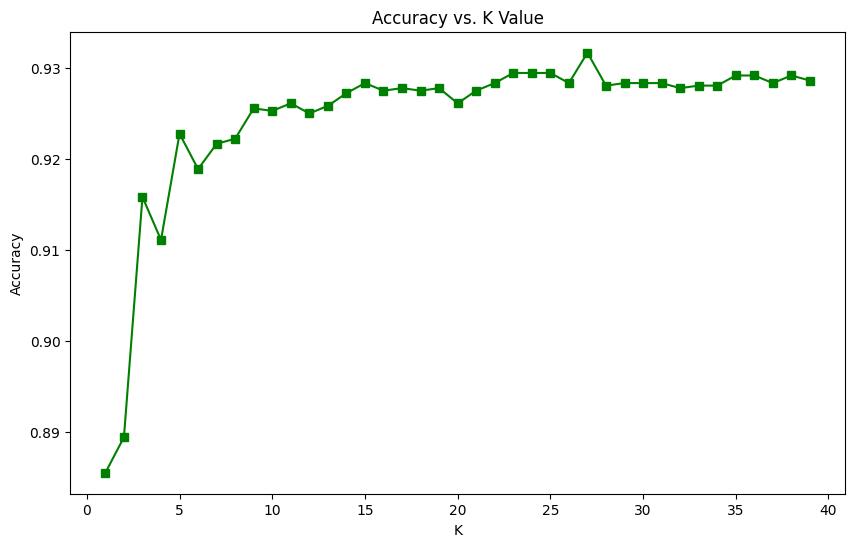

정확도가 가장 높은 최적의 k값은 27입니다.

--- 최적의 결과 요약 ---
최적의 K: 27
최저 오류율: 0.0683
최고 정확도: 0.9317

--- K값별 오류율 상세 내역 ---
K= 1 | Error Rate: 0.1144
K= 2 | Error Rate: 0.1106
K= 3 | Error Rate: 0.0842
K= 4 | Error Rate: 0.0889
K= 5 | Error Rate: 0.0772
K= 6 | Error Rate: 0.0811
K= 7 | Error Rate: 0.0783
K= 8 | Error Rate: 0.0778
K= 9 | Error Rate: 0.0744
K=10 | Error Rate: 0.0747
K=11 | Error Rate: 0.0739
K=12 | Error Rate: 0.0750
K=13 | Error Rate: 0.0742
K=14 | Error Rate: 0.0728
K=15 | Error Rate: 0.0717
K=16 | Error Rate: 0.0725
K=17 | Error Rate: 0.0722
K=18 | Error Rate: 0.0725
K=19 | Error Rate: 0.0722
K=20 | Error Rate: 0.0739
K=21 | Error Rate: 0.0725
K=22 | Error Rate: 0.0717
K=23 | Error Rate: 0.0706
K=24 | Error Rate: 0.0706
K=25 | Error Rate: 0.0706
K=26 | Error Rate: 0.0717
K=27 | Error Rate: 0.0683
K=28 | Error Rate: 0.0719
K=29 | Error Rate: 0.0717
K=30 | Error Rate: 0.0717
K=31 | Error Rate: 0.0717
K=32 | Error Rate: 0.0722
K=33 | Error Rate: 0.0719
K=34 | Error Rate: 0.0719
K=35 | E

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# 1. 데이터 로드
df = pd.read_csv(path + 'synthetic_medical_triage.csv')
# 2. 전처리: 사용자가 지정한 방식으로 arrival_mode 변환
# 글자를 숫자로 직접 매핑합니다. 매핑 방식(k=27)**은 이동 수단 간의 '순서(긴급도)'를 모델에게 가르쳐줌/원-핫 인코딩(k=23)**은 각 수단을 '완전히 독립적인 정보'로 가르쳐준 것
mode_map = {"walk_in": 0, "wheelchair": 1, "ambulance": 2}
df["arrival_mode"] = df["arrival_mode"].map(mode_map)
# triage_level(타겟) 변환
le = LabelEncoder()
df['triage_level'] = le.fit_transform(df['triage_level'])
# X(특징)와 y(정답) 분리
X = df.drop('triage_level', axis=1)
y = df['triage_level']
# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 변환된 칼럼 확인
print("학습에 사용된 칼럼들:", X.columns.tolist())
# 5. 최적의 k값 찾기
error_rate = []
for i in range(1, 40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
optimal_k = error_rate.index(min(error_rate)) + 1
# print(f"오류율이 가장 낮은 최적의 k값은 {optimal_k}입니다.")
# 정확도를 저장할 리스트
accuracy_list = []
for i in range(1, 40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train, y_train)
 # score는 정확도를 의미합니다 (0.0 ~ 1.0)
 acc = knn.score(X_test, y_test)
 accuracy_list.append(acc)
# 6. 시각화 (정확도 그래프)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), accuracy_list, color='green', marker='s')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
best_k = accuracy_list.index(max(accuracy_list)) + 1
print(f"정확도가 가장 높은 최적의 k값은 {best_k}입니다.")
# 7. 상세 오류율 값 출력
print(f"\n--- 최적의 결과 요약 ---")
min_error = min(error_rate)
print(f"최적의 K: {optimal_k}")
print(f"최저 오류율: {min_error:.4f}")
print(f"최고 정확도: {max(accuracy_list):.4f}")
# (선택 사항) 전체 K에 대한 오류율을 보고 싶을 때
print("\n--- K값별 오류율 상세 내역 ---")
for k, error in enumerate(error_rate, start=1):
 print(f"K={k:2d} | Error Rate: {error:.4f}")

## Decision Tree 모델

In [ ]:
# 환자데이터를 활용한 환자의 위험 등급 분류 예측
## 기본설정

from IPython.core.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>")) # HTML 
pip install pydot
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
## 데이터 불러오기

import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("C:/Users/asia/Desktop/synthetic_medical_triage.csv") # CSV 파일로 데이터프레임 생성
## 문자로 되어 있는 범주형 변수 숫자로 변환
mode_map = {"walk_in": 0, "wheelchair": 1, "ambulance": 2} 
df["arrival_mode"] = df["arrival_mode"].map(mode_map) # 숫자로 변경한 변수 데이터프레임에 추가
df.head
len(df)
## 독립변수, 종속변수 설정
X = df.iloc[:, :-1] # 환자 상태 변수
y = df.iloc[:, -1] # 
feature_names = df.columns[:-1].tolist()
## 트리 그리는 함수 만들기
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,
                    feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o','x')
    colors = ('red', 'blue', 'lightgreen','pink')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.5,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc='upper left')
    plt.title(title)
    return Z
dt_model5 = DecisionTreeClassifier(criterion="entropy",
max_depth=5,
random_state=0)
dt_model5.fit(X, y) # 무질서도 기준, depth 5, 시드 0
draw_decision_tree(dt_model5, 
feature_names=feature_names)
## 모델 검증
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

dt_model5.fit(X_train, y_train)

print("train acc:", dt_model5.score(X_train, y_train))
print("test  acc:", dt_model5.score(X_test, y_test))
## 각 변수의 중요도 확인
import pandas as pd
imp = pd.Series(dt_model5.feature_importances_, index=X.columns)\
        .sort_values(ascending=False)

print(imp)
## 제일 높은 중요도 변수 2개로만 생성
feat = ["pain_level", "body_temperature"] # 변수 2개 설정
X2 = df[feat].to_numpy()
y2 = df["triage_level"].to_numpy()

dt_model_f2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
dt_model_f2.fit(X2, y2)


draw_decision_tree(dt_model_f2, 
feature_names=feat)
plot_decision_regions(X2, y2, dt_model_f2, "Depth 5")
plt.xlabel(feat[0]); plt.ylabel(feat[1])
plt.show()

In [ ]:
## 데이터 불러오기

import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("C:/Users/asia/Desktop/synthetic_medical_triage.csv") # CSV 파일로 데이터프레임 생성

In [ ]:
## 문자로 되어 있는 범주형 변수 숫자로 변환
mode_map = {"walk_in": 0, "wheelchair": 1, "ambulance": 2} 
df["arrival_mode"] = df["arrival_mode"].map(mode_map) # 숫자로 변경한 변수 데이터프레임에 추가
df.head
len(df)

In [ ]:
## 독립변수, 종속변수 설정
X = df.iloc[:, :-1] # 환자 상태 변수
y = df.iloc[:, -1] # 
feature_names = df.columns[:-1].tolist()

In [ ]:
## 트리 그리는 함수 만들기
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,
                    feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o','x')
    colors = ('red', 'blue', 'lightgreen','pink')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.5,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc='upper left')
    plt.title(title)
    return Z
dt_model5 = DecisionTreeClassifier(criterion="entropy",
max_depth=5,
random_state=0)
dt_model5.fit(X, y) # 무질서도 기준, depth 5, 시드 0
draw_decision_tree(dt_model5, 
feature_names=feature_names)

In [ ]:
## 모델 검증
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

dt_model5.fit(X_train, y_train)

print("train acc:", dt_model5.score(X_train, y_train))
print("test  acc:", dt_model5.score(X_test, y_test))

In [ ]:
## 각 변수의 중요도 확인
import pandas as pd
imp = pd.Series(dt_model5.feature_importances_, index=X.columns)\
        .sort_values(ascending=False)

print(imp)

In [ ]:
## 제일 높은 중요도 변수 2개로만 생성
feat = ["pain_level", "body_temperature"] # 변수 2개 설정
X2 = df[feat].to_numpy()
y2 = df["triage_level"].to_numpy()

dt_model_f2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
dt_model_f2.fit(X2, y2)


draw_decision_tree(dt_model_f2, 
feature_names=feat)
plot_decision_regions(X2, y2, dt_model_f2, "Depth 5")
plt.xlabel(feat[0]); plt.ylabel(feat[1])
plt.show()
